<a href="https://colab.research.google.com/github/AmaniBKL/Projects-ML/blob/main/Supervised_ML_Decision_Tree_%26_Random_Forest_TitanicDataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
# importing Decision Tree Classifier
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
# importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier 

In [ ]:
# importing relevant libraries
from sklearn.model_selection import train_test_split
# importing metrics to test accuracy
from sklearn import metrics
from sklearn.metrics import accuracy_score 

In [ ]:
# importing data
data = pd.read_csv('/content/TitanicDataSet.csv')

In [ ]:
# verification
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# verification
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# preprocessing our data
def preprocess_data(new_data):
  new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
  new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
  new_data['Cabin'] = new_data.Cabin.fillna('G6')
  new_data['Embarked'] = new_data['Embarked'].fillna(new_data['Embarked'].mode())
  return new_data

In [ ]:
data = preprocess_data(data)

In [ ]:
# verification
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,G6,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,G6,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,G6,S


In [ ]:
# features extraction
x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked", "PassengerId"], axis=1)
y= data["Survived"]

In [ ]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=10)
# we are using the same splitting of data so we can campare between the different models.

In [ ]:
# applying Decision Tree pruning code
dtree = tree.DecisionTreeClassifier(criterion="gini", splitter="random", max_leaf_nodes=10, min_samples_leaf=5, max_depth=5) # building our model
# criterion is the function to measure the quality of a split or criteria is "gini" for the Gini impurity function.
# splitter is the strategy used to choose the split at each node or strategies is "random" to choose the best random split.
# max_depth is the maximum depth of the tree.
# min_samples_leaf is the minimum number of samples required to be at a leaf node.
# max_leaf_nodes are the best nodes which are defined as relative reduction in impurity.
dtree.fit(x_train, y_train) # fitting our model
y_pred=dtree.predict(x_test) # evaluating our model
print("Accuracy:{}".format(accuracy_score(y_test, y_pred)))

Accuracy:0.8491620111731844


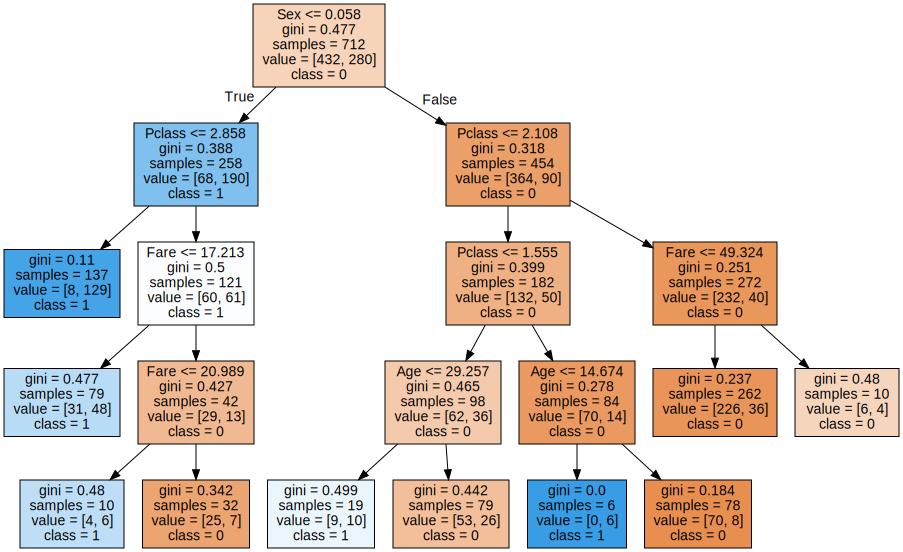

In [ ]:
# decision tree vizualisation
import graphviz
dot_data = tree.export_graphviz(dtree, out_file=None, filled=True, feature_names=('Pclass',  'Sex', 'Age', 'Parch', 'SibSp', 'Fare'), class_names=('0', '1'))
graph = graphviz.Source(dot_data)
graph.render("data")
graph

In [ ]:
# reading desicion tree.
# based on this tree decision , we can conclude that when the ship started to sink, rich women and children had the priority to leave the ship.

In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('score=' + str(roc_auc))

score=0.8353322304935207


In [ ]:
# changing the decision tree parameters
# we changed two parameters which are criterion and splitter.
dtc = DecisionTreeClassifier(criterion="entropy", splitter="best", max_leaf_nodes=10, min_samples_leaf=5, max_depth=5)
# criterion here is "entropy" for the information gain.
# splitter here for this madel is "best" to choose the best split.
dtc.fit(x_train, y_train) # fitting our model
y_pred=dtc.predict(x_test) # evaluating our model
print("New Accuracy:{}".format(accuracy_score(y_test, y_pred)))

New Accuracy:0.8212290502793296


In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8177557209815274

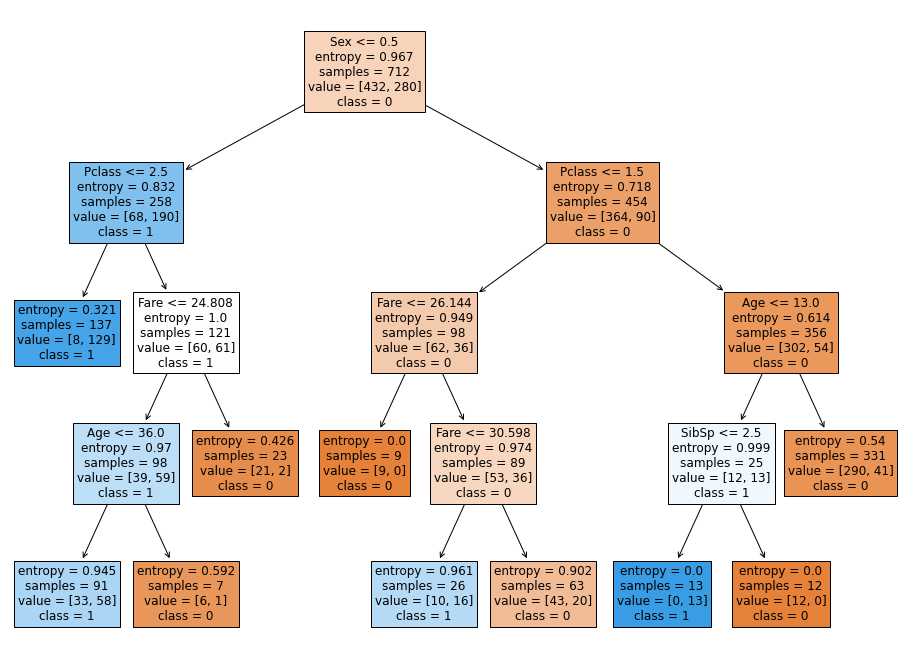

In [ ]:
# decision tree vizualisation
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,12))
a = plot_tree(dtc, feature_names=x.columns, fontsize=12, filled=True, class_names=['0', '1'])

In [ ]:
# reading desicion tree.
# based on this tree decision , we can conclude that when the ship started to sink, 
# rich women and children had the priority to leave the ship then we have rich men and those with a fewer number of siblings have survived.
# the two models with two differents parameters have the same accuracy.

In [ ]:
# random forest 
rf=RandomForestClassifier(n_estimators=10) # creating a random forest with 10 decision trees.
rf.fit(x_train, y_train) # training our model
y_pred=rf.predict(x_test) # testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)) # measuring the accuracy of our model

Accuracy: 0.7988826815642458


In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7779156327543424

In [ ]:
# change the number of estimators
rfc=RandomForestClassifier(n_estimators=100)  # creating a random forest with 100 decision trees.
rfc.fit(x_train, y_train) 
y_pred=rfc.predict(x_test) 
print("New Accuracy:", metrics.accuracy_score(y_test, y_pred)) 

New Accuracy: 0.8324022346368715


In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.822511717673008

In [ ]:
# the higher number of trees used in random forest algorithm, the better performance and the accuracy get.